In [1]:
import numpy as np
# import pandas as pd

import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\udiyo\AppData\Local\Continuum\miniconda3\envs\uni\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Spikes examples

In [2]:
a = np.zeros(11)
a[5] = 1
spikes = np.tile(a, (11,1))
spikes

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [3]:
fft_for_each_row = np.fft.rfft(spikes)    # last dim
np.abs(fft_for_each_row)

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [4]:
fft_for_each_col = np.fft.fft(fft_for_each_row, axis=0)    # first dim
np.abs(fft_for_each_col).astype(int)

array([[11, 11, 10, 11, 11, 11],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [5]:
fft_for_each_col = np.fft.fftshift(fft_for_each_col, axes=0)
np.abs(fft_for_each_col).astype(int)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [11, 11, 10, 11, 11, 11],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [6]:
print(fft_for_each_col.shape)

(11, 6)


## fft2

In [7]:
spikes_hat = np.fft.rfft2(spikes)
np.abs(np.fft.fftshift(spikes_hat, axes=0)).astype(int)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [11, 11, 10, 11, 11, 11],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

# Single ended example

In [8]:
n_x = 500
dx = 10

n_t = 1000
dt = 0.004

# every col is a trace (channel)
data = np.concatenate([np.eye(n_x),np.zeros((n_t - n_x,n_x))], axis=0)
data.shape

(1000, 500)

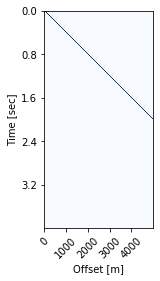

In [9]:
xticks = np.arange(n_x)[::100]
xlabels = xticks*dx
plt.xticks(ticks=xticks, labels=xlabels, rotation=45)
plt.xlabel("Offset [m]")

yticks = np.arange(n_t)[::200]
ylabels = yticks*dt
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel("Time [sec]")

plt.imshow(data, cmap="Blues")
plt.show()

## FFT first way

In [10]:
xlabels = np.fft.fftshift(np.fft.fftfreq(n_x, dx))[::125]
xticks = np.arange(xlabels.size)*125

yticks = np.arange(n_t/2 + 1)[::50]
ylabels = yticks/4

In [11]:
fft_for_each_col = np.fft.rfft(data, axis=0)
fft_for_each_row = np.fft.fft(fft_for_each_col, axis=1)
fft_for_each_row = np.fft.fftshift(fft_for_each_row, axes=1)

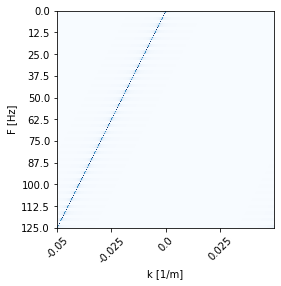

(501, 500)

In [13]:
plt.imshow(np.abs(fft_for_each_row), cmap="Blues")

plt.xticks(ticks=xticks, labels=xlabels, rotation=45)
plt.xlabel("k [1/m]")

plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel("F [Hz]")

plt.show()
fft_for_each_row.shape

## FFT - second way

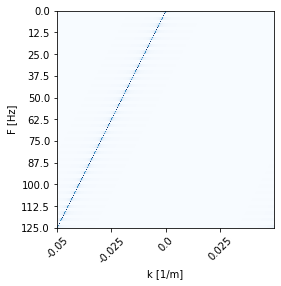

(501, 500)

In [20]:
fft_for_each_row = np.fft.rfft(data.T)    # last dim
fft_for_each_col = np.fft.fft(fft_for_each_row, axis=0)    # first dim
fft_for_each_col = np.fft.fftshift(fft_for_each_col, axes=0)


plt.imshow(np.abs(fft_for_each_col.T), cmap="Blues")

plt.xticks(ticks=xticks, labels=xlabels, rotation=45)
plt.xlabel("k [1/m]")

plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel("F [Hz]")

plt.show()

fft_for_each_col.T.shape

## fft2

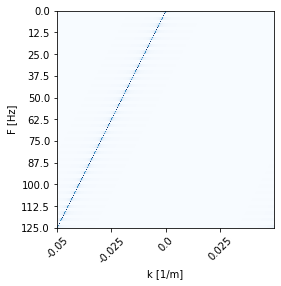

(501, 500)

In [16]:
data_hat = np.fft.rfft2(data.T)
data_hat = np.fft.fftshift(data_hat, axes=0)


plt.imshow(np.abs(data_hat.T), cmap="Blues")

plt.xticks(ticks=xticks, labels=xlabels, rotation=45)
plt.xlabel("k [1/m]")

plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel("F [Hz]")

plt.show()
data_hat.T.shape